In [1]:
from tensorflow.keras import layers
import tensorflow.keras as keras
import tensorflow.keras.backend as K

# Models

In [2]:
feature = 29

## Generators Encoder


In [3]:
input_layer = layers.Input(name='input', shape=(feature))
#x = layers.Reshape((height, width, channels), name='ge_reshape')(input_layer)

# Encoder
x = layers.Dense(1024, name='ge_dense_1')(input_layer)
x = layers.LeakyReLU(name='ge_leaky_1')(x)

x = layers.Dense(512, name='ge_dense_2')(x)
x = layers.LeakyReLU(name='ge_leaky_2')(x)

x = layers.Dense(256, name='ge_dense_3')(x)
x = layers.LeakyReLU(name='ge_leaky_3')(x)

x = layers.Dense(128, name='ge_dense_4')(x)
x = layers.LeakyReLU(name='ge_leaky_4')(x)

#x = layers.GlobalAveragePooling2D(name='g_encoder_output')(x)

g_e = keras.models.Model(inputs=input_layer, outputs=x)

g_e.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 29)]              0         
_________________________________________________________________
ge_dense_1 (Dense)           (None, 1024)              30720     
_________________________________________________________________
ge_leaky_1 (LeakyReLU)       (None, 1024)              0         
_________________________________________________________________
ge_dense_2 (Dense)           (None, 512)               524800    
_________________________________________________________________
ge_leaky_2 (LeakyReLU)       (None, 512)               0         
_________________________________________________________________
ge_dense_3 (Dense)           (None, 256)               131328    
_________________________________________________________________
ge_leaky_3 (LeakyReLU)       (None, 256)               0     

## Generator

In [4]:
input_layer = layers.Input(name='input', shape=(feature))

x = g_e(input_layer)

#y = layers.Reshape((height // 6, width // 6, 128), name='de_reshape1')(x) # 256 = 256 * (6/6) * (6/6) 

y = layers.Dense(256, name='dense_1')(x)
y = layers.LeakyReLU(name='leaky_1')(y)

y = layers.Dense(512, name='dense_2')(y)
y = layers.LeakyReLU(name='leaky_2')(y)

y = layers.Dense(1024, name='dense_3')(y)
y = layers.LeakyReLU(name='leaky_3')(y)

y = layers.Dense(feature, name='dense_4')(y)
y = layers.LeakyReLU(name='leaky_4')(y)

#y = layers.Flatten()(y)
#y = layers.Dense(36, name='dense')(y)
#y = layers.Reshape((height, width, channels), name='de_reshape2')(y)

g = keras.models.Model(inputs=input_layer, outputs=y)

g.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 29)]              0         
_________________________________________________________________
model (Functional)           (None, 128)               719744    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_1 (LeakyReLU)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_2 (LeakyReLU)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              5253

## Encoder

In [5]:
'''input_layer = layers.Input(name='input', shape=(feature))

z = layers.Dense(1024, name='e_dense_1')(input_layer)
z = layers.LeakyReLU(name='e_leaky_1')(z)

z = layers.Dense(512, name='e_dense_2')(z)
z = layers.LeakyReLU(name='e_leaky_2')(z)

z = layers.Dense(256, name='e_dense_3')(z)
z = layers.LeakyReLU(name='e_leaky_3')(z)

z = layers.Dense(128, name='e_dense_4')(z)
z = layers.LeakyReLU(name='e_leaky_4')(z)

#z = layers.GlobalAveragePooling2D(name='encoder_output')(z)

encoder = keras.models.Model(input_layer, z)
encoder.summary()'''

"input_layer = layers.Input(name='input', shape=(feature))\n\nz = layers.Dense(1024, name='e_dense_1')(input_layer)\nz = layers.LeakyReLU(name='e_leaky_1')(z)\n\nz = layers.Dense(512, name='e_dense_2')(z)\nz = layers.LeakyReLU(name='e_leaky_2')(z)\n\nz = layers.Dense(256, name='e_dense_3')(z)\nz = layers.LeakyReLU(name='e_leaky_3')(z)\n\nz = layers.Dense(128, name='e_dense_4')(z)\nz = layers.LeakyReLU(name='e_leaky_4')(z)\n\n#z = layers.GlobalAveragePooling2D(name='encoder_output')(z)\n\nencoder = keras.models.Model(input_layer, z)\nencoder.summary()"

## feature extractor

In [6]:
input_layer = layers.Input(name='input', shape=(feature))
#f = layers.Reshape((height, width, channels), name='f_reshape')(input_layer)

f = layers.Dense(1024, name='f_dense_1')(input_layer)
f = layers.LeakyReLU(name='f_leaky_1')(f)

f = layers.Dense(512, name='f_dense_2')(f)
f = layers.LeakyReLU(name='f_leaky_2')(f)

f = layers.Dense(256, name='f_dense_3')(f)
f = layers.LeakyReLU(name='f_leaky_3')(f)

f = layers.Dense(128, name='f_dense_4')(f)
f = layers.LeakyReLU(name='feature_output')(f)

feature_extractor = keras.models.Model(input_layer, f)

feature_extractor.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 29)]              0         
_________________________________________________________________
f_dense_1 (Dense)            (None, 1024)              30720     
_________________________________________________________________
f_leaky_1 (LeakyReLU)        (None, 1024)              0         
_________________________________________________________________
f_dense_2 (Dense)            (None, 512)               524800    
_________________________________________________________________
f_leaky_2 (LeakyReLU)        (None, 512)               0         
_________________________________________________________________
f_dense_3 (Dense)            (None, 256)               131328    
_________________________________________________________________
f_leaky_3 (LeakyReLU)        (None, 256)               0   

## discriminator

In [7]:
input_layer = layers.Input(name='input', shape=(feature))

f = feature_extractor(input_layer)

#d = layers.Dense(16, name='d_dense_1')(f)
d = layers.Dense(1, activation='sigmoid', name='d_out')(f)
    
d = keras.models.Model(input_layer, d)
d.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 29)]              0         
_________________________________________________________________
model_2 (Functional)         (None, 128)               719744    
_________________________________________________________________
d_out (Dense)                (None, 1)                 129       
Total params: 719,873
Trainable params: 719,873
Non-trainable params: 0
_________________________________________________________________


In [8]:
d.compile(optimizer='adam', loss='binary_crossentropy')

## gan trainer

In [9]:
import tensorflow as tf
class AdvLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AdvLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        y_pred = d(x[1])
        y_true = tf.ones_like(y_pred)
        return keras.losses.binary_crossentropy(y_true,y_pred)

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
class CntLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CntLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori = x[0]
        gan = x[1]
        return K.mean(K.abs(ori - gan))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
class EncLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(EncLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori = x[0]
        gan = x[1]
        return K.mean(K.square(feature_extractor(ori) - feature_extractor(gan)))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)
    
# model for training
input_layer = layers.Input(name='input', shape=(feature))
gan = g(input_layer) # g(x)

adv_loss = AdvLoss(name='adv_loss')([input_layer, gan])
cnt_loss = CntLoss(name='cnt_loss')([input_layer, gan])
enc_loss = EncLoss(name='enc_loss')([input_layer, gan])

gan_trainer = keras.models.Model(input_layer, [adv_loss, cnt_loss, enc_loss])

# loss function
def loss(yt, yp):
    return yp

losses = {
    'adv_loss': loss,
    'cnt_loss': loss,
    'enc_loss': loss,
}

lossWeights = {'cnt_loss': 40.0, 'adv_loss': 1.0, 'enc_loss': 1.0}

# compile
gan_trainer.compile(optimizer = 'adam', loss=losses, loss_weights=lossWeights)

In [10]:
gan_trainer.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 29)]         0                                            
__________________________________________________________________________________________________
model_1 (Functional)            (None, 29)           1439389     input[0][0]                      
__________________________________________________________________________________________________
adv_loss (AdvLoss)              (None,)              0           input[0][0]                      
                                                                 model_1[0][0]                    
__________________________________________________________________________________________________
cnt_loss (CntLoss)              ()                   0           input[0][0]                

# Load Data

In [11]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('creditcard.csv')
print(feature, len(dataset.columns))
col_move = dataset.pop('Class') #pop 'Class' out
dataset.insert(feature,'Class', col_move) #move col 'Class' to last position
dataset.info()

29 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21 

In [12]:
dataset.pop('Time') #drop 'Time'
amount = dataset.pop('Amount')
label = dataset.pop('Class')
dataset['Amount'] = amount
dataset['Class'] = label
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [13]:
from sklearn.preprocessing import StandardScaler
dataset['Amount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1, 1))

In [14]:
dataset_ok = dataset[dataset['Class']==0]
dataset_abn = dataset[dataset['Class']==1]


In [15]:
dataset_X_ok, dataset_X_abn = dataset_ok.iloc[:,:-1], dataset_abn.iloc[:,:-1]
dataset_Y_ok, dataset_Y_abn = dataset_ok['Class'], dataset_abn['Class']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import utils

X_ok, X_abn = dataset_X_ok.values, dataset_X_abn.values
Y_ok, Y_abn = dataset_Y_ok.values, dataset_Y_abn.values

imb_rat = 1
n_test_size = len(Y_abn)*imb_rat/len(Y_ok)

x_train, x_test_ok, y_train, y_test_ok = train_test_split(X_ok, Y_ok, test_size=n_test_size, shuffle=True, random_state=42)
#x_train_abn, x_test_abn, y_train_abn, y_test_abn = train_test_split(X_abn, Y_abn, test_size=0.15, shuffle=True)
print(x_train.shape, y_train.shape, x_test_ok.shape, y_test_ok.shape)

#X_abn, Y_abn = utils.shuffle(X_abn, Y_abn, random_state=42, n_samples=98)

x_test, y_test = utils.shuffle( np.append(x_test_ok, X_abn, axis=0), np.append(y_test_ok, Y_abn, axis=0), random_state=42)
'''sc = StandardScaler()
x_train[:, feature-1:] = sc.fit_transform(x_train[:, feature-1:])
x_test[:, feature-1:] = sc.transform(x_test[:, feature-1:])'''


print(x_test.shape, y_test.shape)
#x_ok = x_train[y_train == 1] # 6742 筆
#x_test = x_test[(y_test == 7) | (y_test == 1)] # 1135 筆 "1", 1028 筆 "7"
#y_test = y_test[(y_test == 7) | (y_test == 1)]

(283823, 29) (283823,) (492, 29) (492,)
(984, 29) (984,)


In [17]:
#x_ok = x_train[y_train == 1] # 6742 筆
#x_test = x_test[(y_test == 7) | (y_test == 1)] # 1135 筆 "1", 1028 筆 "7"
#y_test = y_test[(y_test == 7) | (y_test == 1)]

# Training

In [18]:
niter = 1000
bz = 512

In [19]:
def get_data_generator(data, batch_size=32):
    datalen = len(data)
    cnt = 0
    while True:
        idxes = np.arange(datalen)
        np.random.shuffle(idxes)
        cnt += 1
        for i in range(int(np.ceil(datalen/batch_size))):
            train_x = np.take(data, idxes[i*batch_size: (i+1) * batch_size], axis=0)
            y = np.ones(len(train_x))
            yield train_x, [y, y, y]

In [20]:
train_data_generator = get_data_generator(x_train, bz)

In [21]:
for i in range(niter):
    
    ### get batch x, y ###
    x, y = train_data_generator.__next__()
        
    ### train disciminator ###
    d.trainable = True
        
    fake_x = g.predict(x)
        
    d_x = np.concatenate([x, fake_x], axis=0)
    d_y = np.concatenate([np.zeros(len(x)), np.ones(len(fake_x))], axis=0)
        
    d_loss = d.train_on_batch(d_x, d_y)

    ### train generator ###
    
    d.trainable = False        
    g_loss = gan_trainer.train_on_batch(x, y)
    
    if i % 50 == 0:
        print(f'niter: {i+1}, g_loss: {g_loss}, d_loss: {d_loss}')

niter: 1, g_loss: [26.514034271240234, 0.6965312957763672, 0.6448493599891663, 0.02352859452366829], d_loss: 0.6524966359138489
niter: 51, g_loss: [7.799642562866211, 0.3241693377494812, 0.17241500318050385, 0.5788729190826416], d_loss: 0.237676739692688
niter: 101, g_loss: [6.1741204261779785, 0.1356089860200882, 0.13757607340812683, 0.535468339920044], d_loss: 0.18271896243095398
niter: 151, g_loss: [5.673460006713867, 0.3918956518173218, 0.12425707280635834, 0.31128114461898804], d_loss: 0.33178186416625977
niter: 201, g_loss: [7.035914897918701, 0.12083469331264496, 0.14558441936969757, 1.0917034149169922], d_loss: 0.13623322546482086
niter: 251, g_loss: [10.129898071289062, 0.1191568598151207, 0.1732807755470276, 3.0795106887817383], d_loss: 0.11766838282346725
niter: 301, g_loss: [7.1528496742248535, 0.21344682574272156, 0.143765389919281, 1.1887872219085693], d_loss: 0.20254413783550262
niter: 351, g_loss: [38.2899284362793, 0.26132723689079285, 0.2626144289970398, 27.5240230560

# Save / Load Model

In [22]:
from tensorflow.keras.models import load_model

In [23]:
load = False

In [24]:
if load:
    g_e = load_model('models/ganomaly_dense(FE)_balanced/g_e.h5')
    g = load_model('models/ganomaly_dense(FE)_balanced/g.h5')
    #encoder = load_model('models/ganomaly_dense(FE)_balanced/encoder.h5')
    feature_extractor = load_model('models/ganomaly_dense(FE)_balanced/feature_extractor.h5')
    d = load_model('models/ganomaly_dense(FE)_balanced/d.h5')
else:
    g_e.save('models/ganomaly_dense(FE)_balanced/g_e.h5')
    g.save('models/ganomaly_dense(FE)_balanced/g.h5')
    #encoder.save('models/ganomaly_dense(FE)_balanced/encoder.h5')
    feature_extractor.save('models/ganomaly_dense(FE)_balanced/feature_extractor.h5')
    d.save('models/ganomaly_dense(FE)_balanced/d.h5')

# Evaluation

In [64]:
lat_weight = 0.1
recons_weight = 1-lat_weight

In [65]:
from scipy import stats
from sklearn import utils

encoded = g_e.predict(x_train)
gan_x = g.predict(x_train)
encoded_gan = g_e.predict(gan_x)
recons_loss = np.mean(np.absolute(gan_x - x_train), axis=-1)
lat_loss = np.mean(np.square(encoded - encoded_gan), axis=-1)
#print(enc_loss[0].shape)
print(lat_loss.shape)
#print(recons_loss)
print(recons_loss.shape)
train_score = lat_weight*lat_loss + recons_weight*recons_loss

#train_score = (train_score - np.min(train_score)) / (np.max(train_score) - np.min(train_score)) # map to 0~1
#print(score)
print(train_score.shape)
train_score = train_score.reshape(len(train_score))
# Analyze anomaly scores before scaling
max_train = max(train_score)
min_train = min(train_score)
mean_train = np.mean(train_score)
std_train = np.std(train_score)
confindence = stats.norm.interval(0.9975,loc=mean_train, scale=std_train)
print(confindence)
print( 'Normal class scores: max={!r} / min={!r} / mean={!r} / confidence of 99%={!r}'.format(max_train, min_train, mean_train, confindence) )

(283823,)
(283823,)
(283823,)
(-0.37701425384439535, 0.7681202392386149)
Normal class scores: max=20.552267759319925 / min=0.03822694943592219 / mean=0.19555299269710977 / confidence of 99%=(-0.37701425384439535, 0.7681202392386149)


In [66]:
encoded = g_e.predict(x_test)
gan_x = g.predict(x_test)
encoded_gan = g_e.predict(gan_x)
recons_loss = np.mean(np.absolute(gan_x - x_test), axis=-1)
lat_loss = np.mean(np.square(encoded - encoded_gan), axis=-1)
#print(enc_loss[0].shape)
print(lat_loss.shape)
#print(recons_loss)
print(recons_loss.shape)
score = lat_weight*lat_loss + recons_weight*recons_loss
#score = (score - np.min(score)) / (np.max(score) - np.min(score)) # map to 0~1
#print(score)
print(score.shape)
score = score.reshape(len(score))

# Analyze anomaly scores before scaling
n_score, abn_score = score[y_test == 0], score[y_test == 1]
print( 'Normal class scores: max={!r} / min={!r} / mean={!r} / confidence of 99%={!r}'.format(max(n_score), min(n_score), np.mean(n_score), stats.norm.interval(0.99,loc=np.mean(n_score), scale=np.std(n_score))) )
print( 'Abormal class scores: max={!r} / min={!r} / mean={!r} / confidence of 99%={!r}'.format(max(abn_score), min(abn_score), np.mean(abn_score), stats.norm.interval(0.99,loc=np.mean(abn_score), scale=np.std(abn_score))) )

(984,)
(984,)
(984,)
Normal class scores: max=1.4589764412585497 / min=0.043316563487364304 / mean=0.1831451734830018 / confidence of 99%=(-0.14941038560806857, 0.5157007325740721)
Abormal class scores: max=9.111677860396902 / min=0.0915486396423624 / mean=3.4742061320457833 / confidence of 99%=(-3.795173911332079, 10.743586175423646)


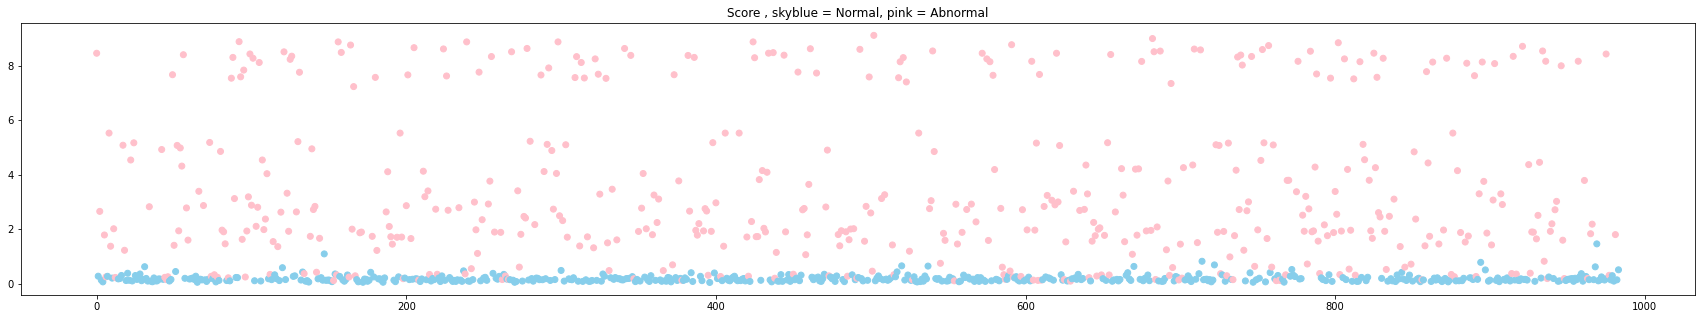

In [67]:
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 30, 5
plt.title('Score , skyblue = Normal, pink = Abnormal')
plt.scatter(range(len(x_test)), score, c=['skyblue' if x == 0 else 'pink' for x in y_test])


(492,) (492,)


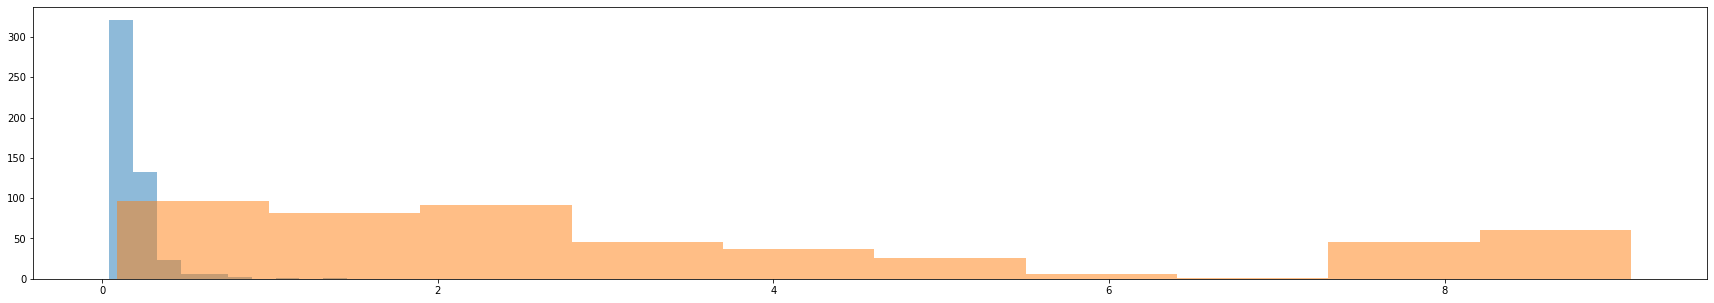

In [68]:
nScore, abnScore = score[y_test==0], score[y_test==1]
print(nScore.shape,abnScore.shape)
plt.hist(nScore, alpha=0.5)
plt.hist(abnScore, alpha=0.5)
plt.show()

# ROC and PR curve for Postive samples

In [69]:
rcParams['figure.figsize'] = 20, 5

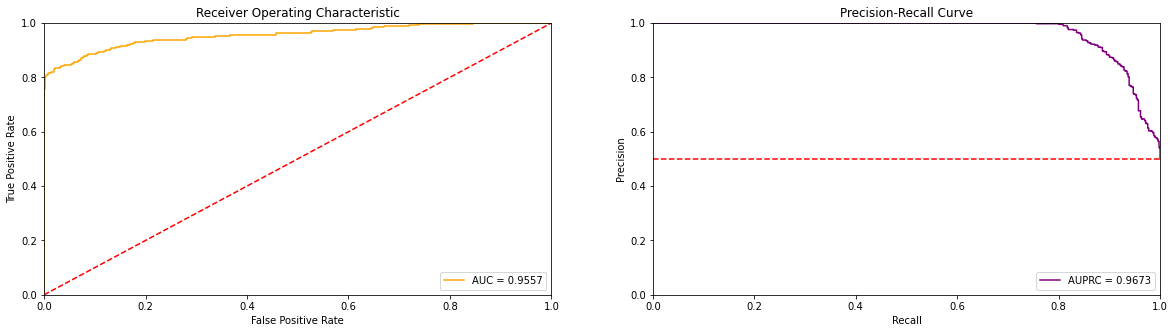

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, average_precision_score
score = score.reshape(len(score))
fpr, tpr, threshold_auc = roc_curve(y_score=score, y_true=y_test, pos_label=1)
precision, recall, threshold_prc = precision_recall_curve(probas_pred=score, y_true=y_test, pos_label=1)

#print(fpr,tpr, threshold)
auc_score = auc(fpr,tpr)
auprc_score = auc(recall, precision)

#plot
fig, ax=plt.subplots(1,2)

#ROC curve
ax[0].set_title('Receiver Operating Characteristic')
ax[0].plot(fpr, tpr, color = 'orange', label = 'AUC = %0.4f' % auc_score)
ax[0].legend(loc = 'lower right')
ax[0].plot([0, 1], [0, 1],'r--')
ax[0].set_xlim([0, 1])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')

#PR curve
ax[1].set_title('Precision-Recall Curve')
ax[1].plot(recall, precision, color = 'purple', label='AUPRC = %0.4f' % auprc_score)
ax[1].legend(loc = 'lower right')
proportion_of_abn = len(abnScore) / (len(nScore)+len(abnScore))
ax[1].plot([0, 1], [proportion_of_abn, proportion_of_abn],'r--')
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 1])
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

plt.show()

In [71]:
# optimal cut off point would be where “true positive rate” is high and the “false positive rate” is low.
J = tpr - fpr
ix1 = np.argmax(J)
optimal_threshold = threshold_auc[ix1]
#optimal_threshold = sorted(list(zip(np.sqrt(tpr-fpr), threshold_auc)), key=lambda i: i[0], reverse=False)[0][1]
print('Optimal threshold for best AUC:',optimal_threshold, 'TPR-FPR=',J[ix1])

fscore = (2 * precision * recall) / (precision + recall)
ix2 = np.nanargmax(fscore)
optimal_prc_threshold = threshold_prc[ix2]
#optimal_prc_threshold = sorted(list(zip(np.abs(precision - recall), threshold_prc)), key=lambda i: i[0], reverse=False)[0][1]
print('Optimal threshold for best AUPRC:',optimal_prc_threshold,'f-score=', fscore[ix2])

Optimal threshold for best AUC: 0.5196971214170392 TPR-FPR= 0.8130081300813008
Optimal threshold for best AUPRC: 0.5196971214170392 f-score= 0.899343544857768


# ROC and PR curve for Negative samples

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


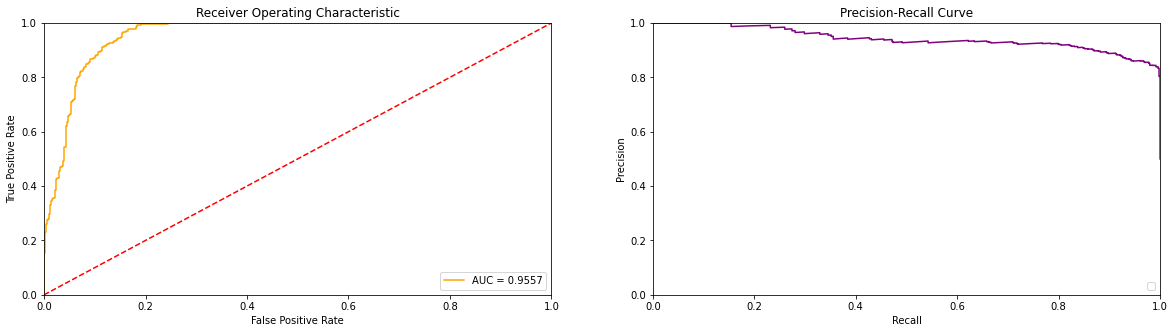

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
score1 = [1-s for s in score]
fpr, tpr, threshold = roc_curve(y_score=score1, y_true=y_test, pos_label=0)
precision, recall, thresholds = precision_recall_curve(probas_pred=score1, y_true=y_test, pos_label=0)

#print(fpr,tpr, threshold)
auc1 = auc(fpr,tpr)

#plot
fig, ax=plt.subplots(1,2)

#ROC curve
ax[0].set_title('Receiver Operating Characteristic')
ax[0].plot(fpr, tpr, color = 'orange', label = 'AUC = %0.4f' % auc1)
ax[0].legend(loc = 'lower right')
ax[0].plot([0, 1], [0, 1],'r--')
ax[0].set_xlim([0, 1])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')

#PR curve
ax[1].set_title('Precision-Recall Curve')
ax[1].plot(recall, precision, color = 'purple')
ax[1].legend(loc = 'lower right')
#ax[1].plot([0, 1], [0, 1],'r--')
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 1])
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

plt.show()

# Set Threshold

              precision    recall  f1-score   support

           0     0.8544    0.9776    0.9118       492
           1     0.9739    0.8333    0.8981       492

    accuracy                         0.9055       984
   macro avg     0.9141    0.9055    0.9050       984
weighted avg     0.9141    0.9055    0.9050       984

AUC = 0.9054878048780489 PRC = 0.8948931116389549


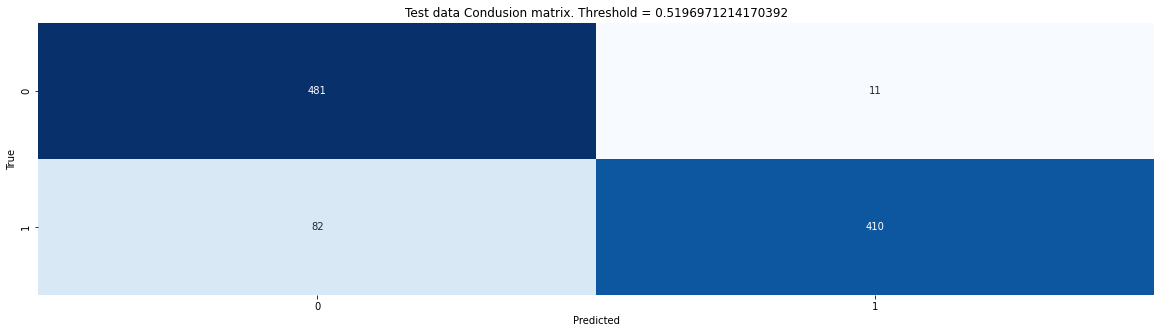

In [73]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

type = np.array(list(set(y_test)))

THR = optimal_prc_threshold
#THR = confindence[1]

yTest_predict = [0 if s<=THR else 1 for s in score]

confu_matrix = confusion_matrix(y_pred=yTest_predict, y_true=y_test)
sns.heatmap(confu_matrix, annot=True, fmt='d',
            xticklabels=type, yticklabels=type, cmap='Blues', cbar=False)
plt.title('Test data Condusion matrix. Threshold = {!r}'.format(THR))
plt.xlabel('Predicted')
plt.ylabel('True')

class_report = classification_report(y_pred=yTest_predict, y_true=y_test, digits=4)
print(class_report)
auc = metrics.roc_auc_score(y_score=yTest_predict, y_true=y_test)
prc = metrics.average_precision_score(y_score=yTest_predict, y_true=y_test)
print('AUC = '+str(auc), 'PRC = '+str(prc))


In [74]:
i = 0 #or 1
y_test[i:i+1]

array([1], dtype=int64)

In [75]:
reconstructed_data = np.reshape(gan_x[i:i+1], (feature))
reconstructed_data

array([ -3.6092637 ,  39.111618  ,  -0.72786605,  -2.7789972 ,
         7.3900075 ,  -8.525582  ,   6.843138  ,  -7.169757  ,
        -1.5885398 ,  -3.160328  ,  -3.635408  ,  -1.7375976 ,
        18.394793  , -13.565761  ,  -1.2774192 ,  -1.2372241 ,
        -2.6469991 ,  -1.7320702 ,  -5.6642404 ,  -3.3540847 ,
        -0.779901  ,  -6.752071  ,  -2.1043394 ,   2.021713  ,
         1.9724525 ,  -1.16615   ,  -1.1810572 ,  -1.687054  ,
        -5.8480196 ], dtype=float32)

In [76]:
data = np.reshape(x_test[i:i+1], (feature))
data

array([-10.64579965,   5.91830666, -11.67104259,   8.80736918,
        -7.97550137,  -3.58680634, -13.61679705,   6.42816935,
        -7.36845129, -12.88815829,   6.85495311, -13.21169503,
         1.03561234, -13.77895564,   1.04044836, -11.29032781,
       -20.57802205,  -7.54782411,   3.11847977,  -0.04617018,
         2.57196959,   0.20680936,  -1.6678014 ,   0.55841875,
        -0.02789788,   0.35425378,   0.27332873,  -0.15290808,
        -0.35322939])